In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


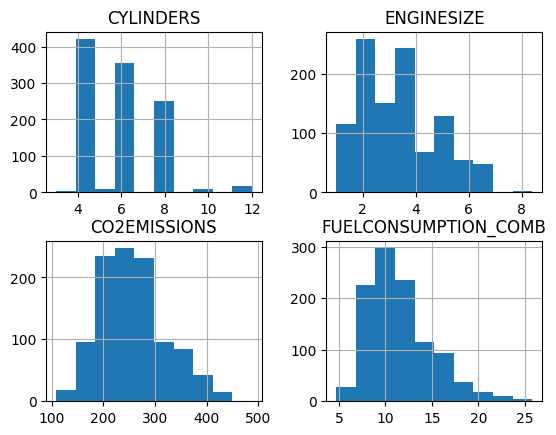

In [3]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

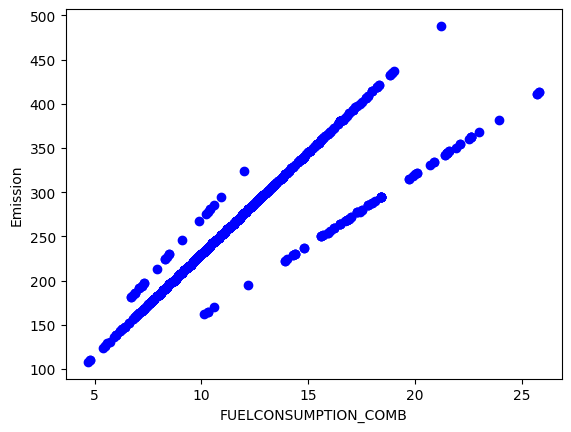

In [4]:
plt.scatter(viz.FUELCONSUMPTION_COMB, viz.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

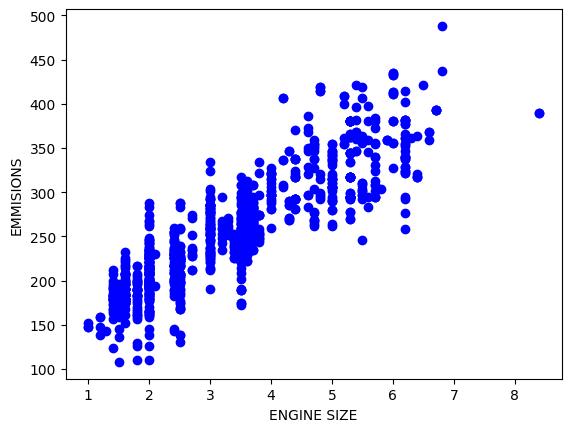

In [5]:
plt.scatter(viz.ENGINESIZE, viz.CO2EMISSIONS, color = 'blue')
plt.ylabel("EMMISIONS")
plt.xlabel("ENGINE SIZE")
plt.show()

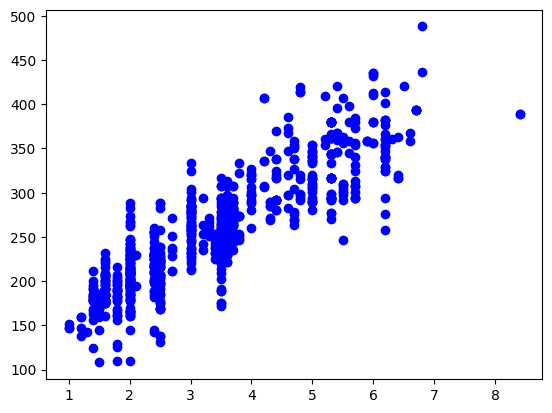

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = viz[msk]
test = viz[~msk]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.show()

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.26905503]]
Intercept:  [125.18427629]


Text(0, 0.5, 'Emission')

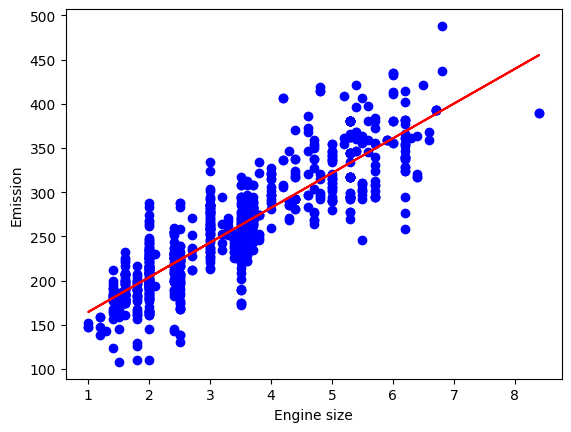

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [9]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.82
Residual sum of squares (MSE): 867.94
R2-score: 0.76


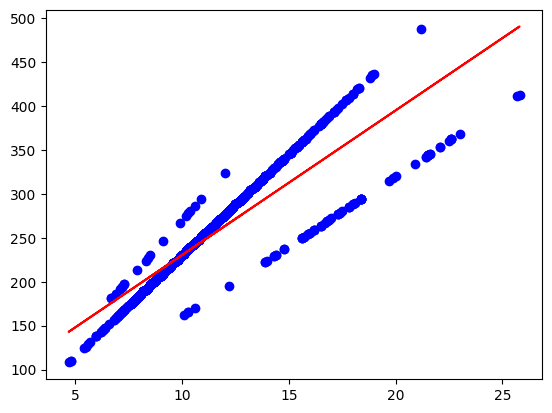

In [10]:

train_x = train[['FUELCONSUMPTION_COMB']]
train_y = train[['CO2EMISSIONS']]
regr.fit(train_x, train_y)
plt.scatter(train_x, train_y, color = 'blue')
plt.plot(train_x, train_x * regr.coef_ + regr.intercept_, color = 'red')

In [11]:
test_x = test[['FUELCONSUMPTION_COMB']]
test_y = test[['CO2EMISSIONS']]
predictions = regr.predict(test_x)
print("MEAN: %.2f" % np.mean(np.absolute(predictions - test_y)))

MEAN: 18.10


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


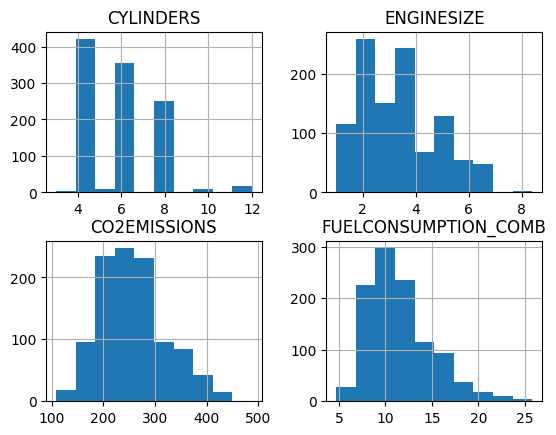

In [13]:
msk = np.random.rand(len(df)) < 0.8
temp = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
train = temp[msk]
test = temp[~msk]
viz.hist()
plt.show()

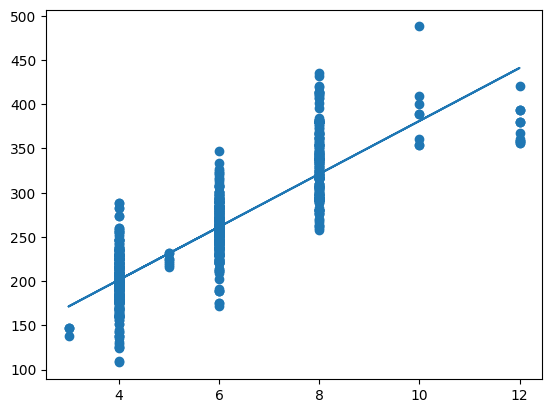

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = train[['CYLINDERS']]
train_y = train[['CO2EMISSIONS']]
plt.scatter(train_x, train_y)
reg.fit(train_x, train_y)
plt.plot(train_x, train_x * reg.coef_ + reg.intercept_)

In [15]:
test_x = test[['CYLINDERS']]
test_y = test[['CO2EMISSIONS']]
predictions = reg.predict(test_x)
print("ERROR % 0.2f" % np.mean(np.absolute(predictions - test_y)))

ERROR  27.35


<h1>MULTIPLE LINEAR REGRESSION</h1>

In [16]:
temp = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = temp[msk]
test = temp[~msk]
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = train[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']]
train_y = train[['CO2EMISSIONS']]
reg.fit(train_x, train_y)
print('Coefficients', reg.coef_)

Coefficients [[8.53513682 9.19027284 9.71068666]]


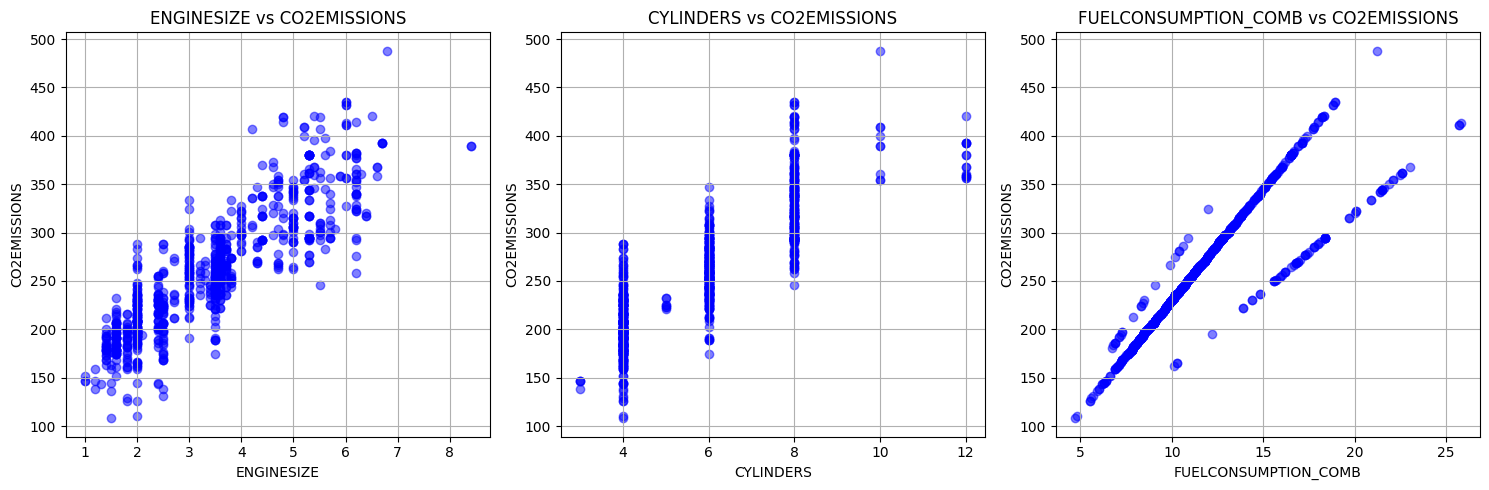

In [17]:
import matplotlib.pyplot as plt

# Define the x and y variables
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

# Variable names for plotting
feature_names = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']

# Plot each feature against CO2EMISSIONS
plt.figure(figsize=(15, 5))  # Set a wide figure for multiple plots
for i in range(x.shape[1]):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each feature
    plt.scatter(x[:, i], y, color='blue', alpha=0.5)
    plt.xlabel(feature_names[i])
    plt.ylabel("CO2EMISSIONS")
    plt.title(f'{feature_names[i]} vs CO2EMISSIONS')
    plt.grid()

plt.tight_layout()  # Adjust spacing
plt.show()


C:\Users\sukri\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

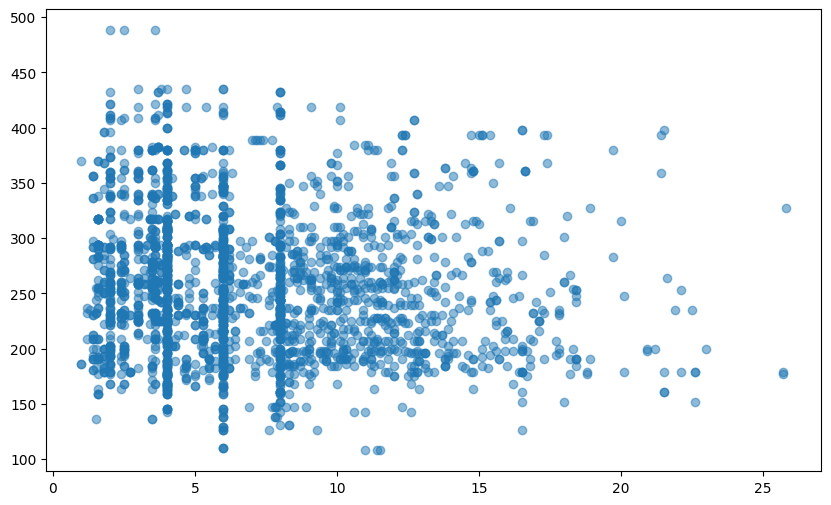

In [18]:
import matplotlib.pyplot as plt

# Combine all independent variables into a single array for plotting
x_combined = np.concatenate([x[:, i] for i in range(x.shape[1])])
y_combined = np.tile(y, x.shape[1])  # Repeat y values for each feature

# Create a corresponding array of labels for features
labels = np.concatenate([[f'Feature {i + 1}'] * len(y) for i in range(x.shape[1])])

plt.figure(figsize=(10, 6))
plt.scatter(x_combined, y_combined, alpha=0.5, label='Actual')

# Add predictions to the plot
y_pred_combined = np.concatenate([regr.predict(x)[:, 0] for _ in range(x.shape[1])])
plt.scatter(x_combined, y_pred_combined, alpha=0.5, color='red', label='Predicted')

plt.xlabel("Independent Variables (Combined)")
plt.ylabel("CO2EMISSIONS")
plt.title("Multiple Linear Regression - Combined View")
plt.legend()
plt.show()
